#### Import libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
plt=reload(plt)
pd.options.mode.chained_assignment = None

#### Importing the data

In [50]:
results=pd.read_csv("results.csv")
pens=pd.read_csv("shootouts.csv")

#### Review the data

In [51]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [52]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43188 entries, 0 to 43187
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43188 non-null  object
 1   home_team   43188 non-null  object
 2   away_team   43188 non-null  object
 3   home_score  43188 non-null  int64 
 4   away_score  43188 non-null  int64 
 5   tournament  43188 non-null  object
 6   city        43188 non-null  object
 7   country     43188 non-null  object
 8   neutral     43188 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [53]:
pens.head(10)

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia
5,1973-07-26,Cambodia,Singapore,Singapore
6,1973-07-27,Bangladesh,Thailand,Thailand
7,1973-07-28,Myanmar,South Korea,Myanmar
8,1973-08-09,India,Vietnam Republic,Vietnam Republic
9,1973-08-23,Algeria,Syria,Syria


In [54]:
pens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       455 non-null    object
 1   home_team  455 non-null    object
 2   away_team  455 non-null    object
 3   winner     455 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


#### Data Preparation

* Adding column "winner" to the results dataset

In [55]:
winner=[]
for i in range(len(results)):
    if (results["home_score"][i]> results["away_score"][i]):
        winner.append(results["home_team"][i])
    elif (results["home_score"][i]< results["away_score"][i]):
        winner.append(results["away_team"][i])
    elif(results["home_score"][i]== results["away_score"][i]):
        winner.append("Draw")


results["winner"]=winner
results.head(10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Scotland
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Scotland


* Breaking down the date column

In [56]:
results["date"]=pd.to_datetime(results["date"])
results["year"]=pd.DatetimeIndex(results["date"]).year
results["month"]=pd.DatetimeIndex(results["date"]).month_name()
results=results[["date","year","month","home_team","away_team","home_score","winner","away_score","tournament",
                 "city","country","neutral"]]
results.head(5)

,date,year,month,home_team,away_team,home_score,winner,away_score,tournament,city,country,neutral
0,1872-11-30,1872,November,Scotland,England,0,Draw,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,1873,March,England,Scotland,4,England,2,Friendly,London,England,False
2,1874-03-07,1874,March,Scotland,England,2,Scotland,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,1875,March,England,Scotland,2,Draw,2,Friendly,London,England,False
4,1876-03-04,1876,March,Scotland,England,3,Scotland,0,Friendly,Glasgow,Scotland,False


In [57]:
pens["date"]=pd.to_datetime(pens["date"])
pens["year"]=pd.DatetimeIndex(pens["date"]).year
pens["month"]=pd.DatetimeIndex(pens["date"]).month_name()
pens=pens[["date","year","month","home_team","away_team","winner"]]
pens.head(5)

,date,year,month,home_team,away_team,winner
0,1967-08-22,1967,August,India,Taiwan,Taiwan
1,1971-11-14,1971,November,South Korea,Vietnam Republic,South Korea
2,1972-05-17,1972,May,Thailand,South Korea,South Korea
3,1972-05-19,1972,May,Thailand,Cambodia,Thailand
4,1973-07-26,1973,July,Malaysia,Kuwait,Malaysia


#### Analysis

* Top 10 years with the most played games 

In [58]:

top_10_Y=pd.DataFrame(results["year"].value_counts().head(10))
top_10_Y.columns=["Number of games"]
top_10_Y

,Number of games
2019,1156
2008,1095
2021,1086
2011,1083
2004,1066
2000,1026
2001,1022
2012,1007
2015,1003
2007,975


* The increase of number of games over years

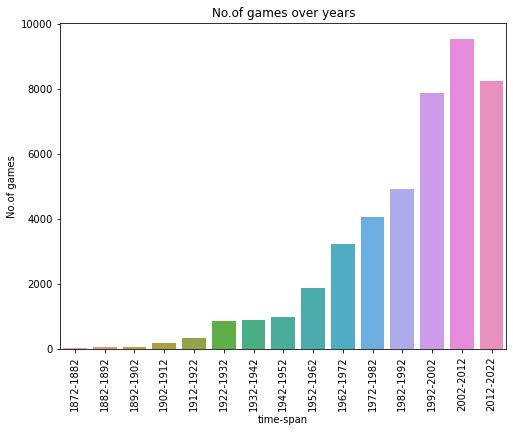

In [59]:
freq_table=results.copy()
freq_table["freq"]=pd.cut(results["year"],15)
decades=pd.DataFrame(freq_table.groupby("freq")["year"].count().reset_index())
order=["1872-1882","1882-1892","1892-1902","1902-1912","1912-1922","1922-1932","1932-1942","1942-1952",
       "1952-1962","1962-1972","1972-1982","1982-1992","1992-2002","2002-2012","2012-2022"]
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=decades,x="freq",y="year")
plt.xlabel("time-span")
plt.ylabel("No.of games")
plt.title("No.of games over years")
ax.set_xticklabels(order)
plt.xticks(rotation="vertical");




* Historical game distribution over months


<AxesSubplot:>

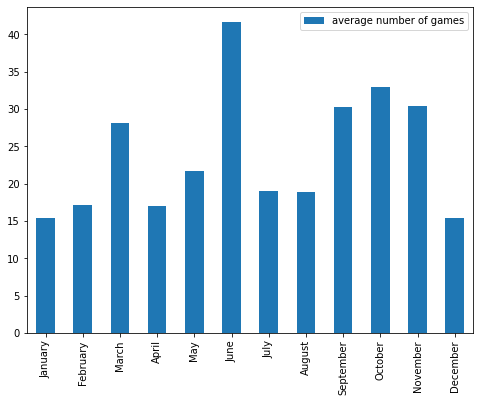

In [60]:
avg_month_games=pd.DataFrame(results["month"].value_counts()/150)
avg_month_games.columns=["average number of games"]
order=["January","February","March","April","May","June","July","August","September","October","November","December"]
arr=avg_month_games.reindex(index=order)
arr.plot(kind="bar",figsize=(8,6))


* Top 10 most playing at home teams

In [61]:
home_top_10=pd.DataFrame(results["home_team"].value_counts().head(10))
home_top_10.columns=["games played at home"]
home_top_10

,games played at home
Brazil,586
Argentina,561
Mexico,529
Germany,521
England,516
Sweden,501
France,496
South Korea,489
Hungary,470
Italy,461


*  least playing at home teams

In [62]:
home_least_10=pd.DataFrame(results["home_team"].value_counts().tail(10))
home_least_10.columns=["games played at home"]
home_least_10

,games played at home
Raetia,2
Romani people,1
Central Spain,1
Madrid,1
Western Australia,1
Saint Pierre and Miquelon,1
Sark,1
Kabylia,1
Chameria,1
Saint Helena,1


* Highest number of goals scored by home teams

In [63]:
highest_score_h=results.sort_values("home_score",ascending=False).head(5).reset_index()
highest_score_h

,index,date,year,month,home_team,away_team,home_score,winner,away_score,tournament,city,country,neutral
0,23923,2001-04-11,2001,April,Australia,American Samoa,31,Australia,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
1,7975,1971-09-13,1971,September,Tahiti,Cook Islands,30,Tahiti,0,South Pacific Games,Papeete,French Polynesia,False
2,11068,1979-08-30,1979,August,Fiji,Kiribati,24,Fiji,0,South Pacific Games,Nausori,Fiji,False
3,23920,2001-04-09,2001,April,Australia,Tonga,22,Australia,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
4,28959,2006-11-24,2006,November,Sápmi,Monaco,21,Sápmi,1,Viva World Cup,Hyères,France,True


* Top 10 most playing away teams

In [64]:
away_top_10=pd.DataFrame(results["away_team"].value_counts().head(10))
away_top_10.columns=["games played away"]
away_top_10

,games played away
Uruguay,551
Sweden,542
England,520
Hungary,486
Paraguay,466
Germany,453
Poland,442
Argentina,442
Zambia,431
Finland,428


*  least playing away teams

In [65]:
away_least_10=pd.DataFrame(results["away_team"].value_counts().tail(10))
away_least_10.columns=["games played away"]
away_least_10

,games played away
Western Sahara,2
Yorkshire,2
Andalusia,1
Central Spain,1
Corsica,1
Manchukuo,1
Barawa,1
Parishes of Jersey,1
Asturias,1
Surrey,1


* Highest number of goals scored by away teams

In [66]:
highest_score_a=results.sort_values("away_score",ascending=False).head(5).reset_index()
highest_score_a

,index,date,year,month,home_team,away_team,home_score,winner,away_score,tournament,city,country,neutral
0,27500,2005-03-11,2005,March,Guam,North Korea,0,North Korea,21,EAFF Championship,Taipei,Taiwan,True
1,14846,1987-12-15,1987,December,American Samoa,Papua New Guinea,0,Papua New Guinea,20,South Pacific Games,Nouméa,New Caledonia,True
2,36157,2014-06-01,2014,June,Darfur,Padania,0,Padania,20,CONIFA World Football Cup,Östersund,Sweden,True
3,25826,2003-06-30,2003,June,Sark,Isle of Wight,0,Isle of Wight,20,Island Games,St. Martin,Guernsey,True
4,12852,1983-08-22,1983,August,Niue,Papua New Guinea,0,Papua New Guinea,19,South Pacific Games,Apia,Western Samoa,True


* Top 10 most frequent results

In [67]:
results["result"]=results["home_score"].astype(str)+"-"+results["away_score"].astype(str)
most_freq_result=pd.DataFrame(results["result"].value_counts().head(10))
most_freq_result.columns=["result occurance"]
most_freq_result

,result occurance
1-0,4448
1-1,4338
0-0,3537
2-0,3352
2-1,3289
0-1,3030
1-2,2252
3-0,2040
0-2,1936
2-2,1706


* Most winning teams

In [68]:
win_df=results[results["winner"]!="Draw"]
top_10_wins=pd.DataFrame(win_df["winner"].value_counts().head(10))
top_10_wins.columns=["games won"]
top_10_wins

,games won
Brazil,644
England,592
Germany,570
Argentina,539
Sweden,514
South Korea,470
Mexico,455
Hungary,448
Italy,440
France,433


* least winning teams

In [69]:
least_10_wins=pd.DataFrame(win_df["winner"].value_counts().tail(10))
least_10_wins.columns=["games won"]
least_10_wins

,games won
Chagos Islands,1
Saarland,1
Republic of St. Pauli,1
Central Spain,1
Surrey,1
Asturias,1
Two Sicilies,1
Kabylia,1
Gozo,1
Micronesia,1


* All competetions and number of games played in each

In [70]:
comp=pd.DataFrame(results["tournament"].value_counts().reset_index())
comp.columns=["tournament","games"]
comp

,tournament,games
0,Friendly,17276
1,FIFA World Cup qualification,7885
2,UEFA Euro qualification,2594
3,African Cup of Nations qualification,1719
4,FIFA World Cup,900
...,...,...
121,AFF Championship qualification,2
122,Atlantic Heritage Cup,2
123,Cup of Ancient Civilizations,2
124,FIFA 75th Anniversary Cup,1


* Percentage of games that been decided with penalties of all the competetive games (Friendly games excluded)

In [71]:
no_friendly_games=results.loc[results["tournament"]!="Friendly"]
number_of_games=len(no_friendly_games)
number_of_games_with_pens=len(pens)
print("Percentage of games decided after penalties shootouts=" ,(number_of_games_with_pens/number_of_games)*100)

Percentage of games decided after penalties shootouts= 1.7559431923433158


* Most winning teams with penalties

In [72]:
most_pens_win=pd.DataFrame(pens["winner"].value_counts().head(10))
most_pens_win

,winner
Egypt,13
South Korea,13
Argentina,11
South Africa,10
Zambia,10
Kenya,10
Botswana,8
Nigeria,8
Brazil,8
Senegal,8


#### More in depth analysis to figure out wheather playing at home is really a big of advantage or not

* First we have to exclude all the games that has been played in neutral field since being a home team then is just a formality

In [98]:
results_H_A=results.loc[results["neutral"]==False]
results_H_A.head(5)

,date,year,month,home_team,away_team,home_score,winner,away_score,tournament,city,country,neutral,result
0,1872-11-30,1872,November,Scotland,England,0,Draw,0,Friendly,Glasgow,Scotland,False,0-0
1,1873-03-08,1873,March,England,Scotland,4,England,2,Friendly,London,England,False,4-2
2,1874-03-07,1874,March,Scotland,England,2,Scotland,1,Friendly,Glasgow,Scotland,False,2-1
3,1875-03-06,1875,March,England,Scotland,2,Draw,2,Friendly,London,England,False,2-2
4,1876-03-04,1876,March,Scotland,England,3,Scotland,0,Friendly,Glasgow,Scotland,False,3-0


* Second: Adding a column to categorize the winning team

In [95]:
results_H_A["winner_cat"] = results_H_A.apply(lambda x: "H" if x["home_team"] ==x["winner"] 
                                              else ("A" if x["away_team"] ==x["winner"] else "D"),axis=1)
results_H_A["winner_cat"].value_counts()

H    16403
A     8565
D     7513
Name: winner_cat, dtype: int64

* Third: Plotting the results 

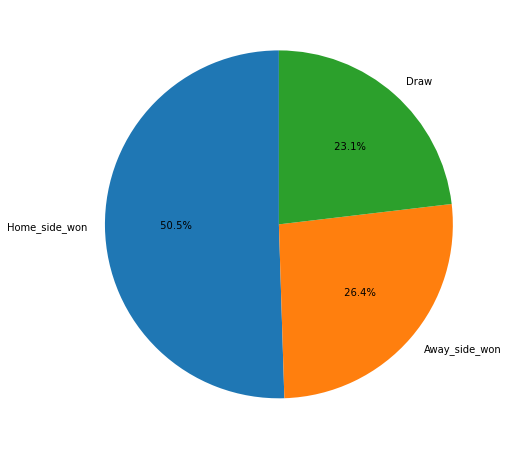

In [97]:
fig, ax =plt.subplots(figsize=(8,8))
ax=plt.pie(results_H_A["winner_cat"].value_counts(),labels=["Home_side_won","Away_side_won","Draw"],autopct="% 1.1f%%",startangle=90)

* cross analysis between playing at home and winning:
* First we numerate the winning and the home_team columns

In [116]:
results_H_A["home_won"] = results_H_A.apply(lambda x: 1 if x["home_team"] ==x["winner"] 
                                              else 0,axis=1)
results_H_A["home_team?"]=[1]*len(results_H_A)
results_H_A.head(5)

,date,year,month,home_team,away_team,home_score,winner,away_score,tournament,city,country,neutral,result,home_won,home_team?
0,1872-11-30,1872,November,Scotland,England,0,Draw,0,Friendly,Glasgow,Scotland,False,0-0,0,1
1,1873-03-08,1873,March,England,Scotland,4,England,2,Friendly,London,England,False,4-2,1,1
2,1874-03-07,1874,March,Scotland,England,2,Scotland,1,Friendly,Glasgow,Scotland,False,2-1,1,1
3,1875-03-06,1875,March,England,Scotland,2,Draw,2,Friendly,London,England,False,2-2,0,1
4,1876-03-04,1876,March,Scotland,England,3,Scotland,0,Friendly,Glasgow,Scotland,False,3-0,1,1


* Then we get the cross table

In [112]:
c_tab=pd.crosstab(results_H_A["home_team?"],results_H_A["home_won"])
c_tab

home_won,0,1
home_team?,,
1,16078,16403


#### Now let's see wheather being named the home team whenever the game played on a neutral field, made any difference 

* First we will include only the games played on neutral fields

In [114]:
results_N=results.loc[results["neutral"]==True]
results_N.head(5)
len(results_N)

10707

* Second: Adding a column to categorize the winning team

In [115]:
results_N["winner_cat"] = results_N.apply(lambda x: "H" if x["home_team"] ==x["winner"] 
                                              else ("A" if x["away_team"] ==x["winner"] else "D"),axis=1)
results_N["winner_cat"].value_counts()

H    4606
A    3659
D    2442
Name: winner_cat, dtype: int64

* Third: Plotting the results 

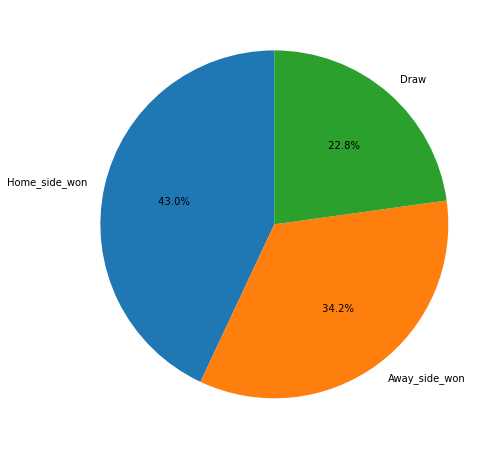

In [117]:
fig, ax =plt.subplots(figsize=(8,8))
ax=plt.pie(results_N["winner_cat"].value_counts(),labels=["Home_side_won","Away_side_won","Draw"],autopct="% 1.1f%%",startangle=90)